<a href="https://colab.research.google.com/github/spe301/CNN-tutorial/blob/main/CNN_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A beginner's guide to Convolutional Neural Networks

Convolutional Neural Networks (CNN) were originally created by Yahn LeCunn in the 1980's during his Post-Docand are designed for computer vision tasks including image classification. It wasn't until the data explosion of the 2010's, however, that they started getting used in the real world. In this tutorial I'll walk you through the process of building a CNN in Keras, data preprocessing, interpreting results, and finish with some OOP to help streamline this process. This will be done in colabs, this way it'll work on anybody's machine.

Let's import our dependencies first, 

In [1]:
from tensorflow.keras import models, layers # for the CNN model
from tensorflow.keras.datasets import mnist, cifar10 # our dataset
import numpy as np # does some math for us
from matplotlib import pyplot as plt
from sklearn.preprocessing import OneHotEncoder #will help us transform the labels

def ViewAccuracy(history):
  '''plots a model's accuracy throughout training'''
  plt.plot(list(range(len(history.history['accuracy']))), history.history['accuracy'], label='train');
  plt.plot(list(range(len(history.history['accuracy']))), history.history['val_accuracy'], label='val');
  plt.legend(loc='best')
  plt.xlabel('epochs')
  plt.ylabel('accuracy')
  return None


def ViewLoss(history):
  '''plots a model's loss throughout training'''
  plt.plot(list(range(len(history.history['loss']))), history.history['loss'], label='train');
  plt.plot(list(range(len(history.history['loss']))), history.history['val_loss'], label='val');
  plt.legend(loc='best')
  plt.xlabel('epochs')
  plt.ylabel('loss')
  return None

In [ ]:
train, test = mnist.load_data()
train_images, train_labels = train
test_images, test_labels = test

In [ ]:
# inspecting our data's shape
train_images.shape, train_labels.shape, test_images.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

These numbers essentially mean that we will train the computer on 60,000 images, these are handwritten digits by the way, and test it on 10,000. each image is 28x28 pixels in size and is on a binary color scale. This means that all the pixels are on a specrum between two colors(i.e. black and white), as opposed to being in color and having a value for red, blue, and green. here's an example of one of our images

(<matplotlib.image.AxesImage at 0x7f123ce5ca10>, 5)

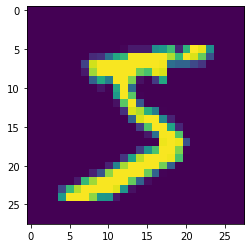

In [ ]:
selected = 0
image = train_images[selected]
label = train_labels[selected]
plt.imshow(image), label

Next, we will build our model. Our model will have 3 convolutional blocks, each with 28 filters. We add a pooling layer in between each convolutional layer and we add a flatten layer after the last convolution. The reason for this is to generate the final output.

In [ ]:
cnn = models.Sequential()
cnn.add(layers.Conv2D(28, (3, 3), activation='relu', input_shape=(28, 28, 1)))
cnn.add(layers.MaxPooling2D(2, 2))
cnn.add(layers.Conv2D(56, (3, 3), activation='relu'))
cnn.add(layers.MaxPooling2D(2, 2))
cnn.add(layers.Conv2D(56, (3, 3), activation='relu'))
cnn.add(layers.Flatten())
cnn.add(layers.Dense(64, activation='relu'))
cnn.add(layers.Dense(10, activation='softmax'))
cnn.compile(metrics='accuracy', optimizer='rmsprop', loss='categorical_crossentropy')
cnn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 28)        280       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 28)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 56)        14168     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 5, 5, 56)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 3, 3, 56)          28280     
_________________________________________________________________
flatten_2 (Flatten)          (None, 504)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)               

In [ ]:
X = train_images.reshape(60000, 28, 28, 1)
Xval = test_images.reshape(10000, 28, 28, 1)
y = OneHotEncoder().fit_transform(train_labels.reshape(-1, 1)).toarray()
yval = OneHotEncoder().fit_transform(test_labels.reshape(-1, 1)).toarray()
history = cnn.fit(X, y, batch_size=64, epochs=10, validation_split=0.2)

Epoch 1/10
750/750 [==============================] - 35s 47ms/step - loss: 0.0663 - accuracy: 0.9807 - val_loss: 0.0529 - val_accuracy: 0.9848
Epoch 2/10
750/750 [==============================] - 35s 47ms/step - loss: 0.0475 - accuracy: 0.9868 - val_loss: 0.0617 - val_accuracy: 0.9850
Epoch 3/10
750/750 [==============================] - 35s 47ms/step - loss: 0.0383 - accuracy: 0.9898 - val_loss: 0.0567 - val_accuracy: 0.9870
Epoch 4/10
750/750 [==============================] - 35s 47ms/step - loss: 0.0375 - accuracy: 0.9903 - val_loss: 0.0626 - val_accuracy: 0.9868
Epoch 5/10
750/750 [==============================] - 36s 48ms/step - loss: 0.0334 - accuracy: 0.9915 - val_loss: 0.0857 - val_accuracy: 0.9843
Epoch 6/10
750/750 [==============================] - 36s 48ms/step - loss: 0.0296 - accuracy: 0.9932 - val_loss: 0.0711 - val_accuracy: 0.9885
Epoch 7/10
750/750 [==============================] - 36s 48ms/step - loss: 0.0296 - accuracy: 0.9933 - val_loss: 0.1020 - val_accuracy:

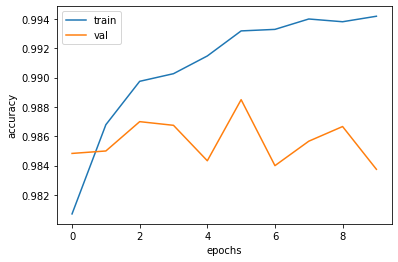

In [ ]:
ViewAccuracy(history)

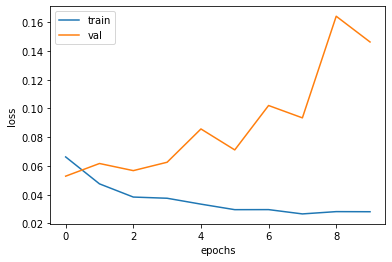

In [ ]:
ViewLoss(history)

In [ ]:
cnn.evaluate(X, y, batch_size=64)

938/938 [==============================] - 13s 13ms/step - loss: 0.0510 - accuracy: 0.9919


[0.05099284276366234, 0.9919000267982483]

In [ ]:
cnn.evaluate(Xval, yval, batch_size=64)

157/157 [==============================] - 2s 14ms/step - loss: 0.1569 - accuracy: 0.9823


[0.1568770557641983, 0.9822999835014343]

predicted: 6, actual: 6


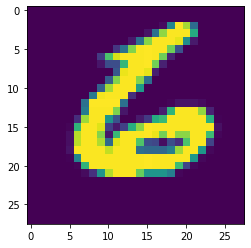

In [ ]:
selected = 9999
predicted = cnn.predict(Xval[selected].reshape(1, 28, 28, 1)).argmax()
actual = test_labels[selected]
print('predicted: {}, actual: {}'.format(predicted, actual))
plt.imshow(Xval[selected])

Our model's accuracy is really good for training and testing both. However, the loss does indicate that there is some overfitting. We're going to see if we can fix these issues.

In [ ]:
cnn2 = models.Sequential()
cnn2.add(layers.Conv2D(28, (3, 3), activation='relu', input_shape=(28, 28, 1)))
cnn2.add(layers.MaxPooling2D(2, 2))
cnn2.add(layers.Conv2D(56, (3, 3), activation='relu'))
cnn2.add(layers.MaxPooling2D(2, 2))
cnn2.add(layers.Conv2D(56, (3, 3), activation='relu'))
cnn2.add(layers.Flatten())
cnn2.add(layers.Dense(64, activation='relu'))
cnn2.add(layers.Dense(10, activation='softmax'))
cnn2.compile(metrics='accuracy', optimizer='rmsprop', loss='categorical_crossentropy')
cnn2.summary()
history = cnn2.fit(X, y, batch_size=64, epochs=10, validation_split=0.2) 